In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [54]:
df=pd.read_csv('online_course_engagement_data.csv')
df.sample(10)

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
2834,2722,Programming,73.231058,11,4,95.027443,61.164327,1,1
2718,3802,Science,74.274790,15,6,63.665626,52.199964,0,0
4556,862,Business,79.644038,11,6,67.418530,70.813914,0,1
2533,103,Science,87.625861,18,2,70.268931,45.411269,0,0
6706,2330,Programming,56.127597,8,1,63.156636,29.259951,1,0
5576,3522,Arts,88.391466,14,6,97.753961,17.882000,1,1
6981,7503,Science,4.634090,2,9,95.465296,18.968212,1,0
7427,3031,Business,32.824785,18,5,70.033002,4.153236,1,1
46,911,Science,11.445851,6,8,82.992782,55.470633,1,0
4987,5492,Arts,45.139114,13,7,55.956360,10.194910,1,0


In [52]:
## Since user id is not important so remove it
df.drop(['UserID'],axis=1,inplace=True)
df.head()

KeyError: "['UserID'] not found in axis"

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CourseCategory         9000 non-null   object 
 1   TimeSpentOnCourse      9000 non-null   float64
 2   NumberOfVideosWatched  9000 non-null   int64  
 3   NumberOfQuizzesTaken   9000 non-null   int64  
 4   QuizScores             9000 non-null   float64
 5   CompletionRate         9000 non-null   float64
 6   DeviceType             9000 non-null   int64  
 7   CourseCompletion       9000 non-null   int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 562.6+ KB


In [5]:
df.isna().sum()

CourseCategory           0
TimeSpentOnCourse        0
NumberOfVideosWatched    0
NumberOfQuizzesTaken     0
QuizScores               0
CompletionRate           0
DeviceType               0
CourseCompletion         0
dtype: int64

In [6]:
##There is no empty data so now go to directly to insights of the data
## seeing the isight fro the caetegory dataset
df['CourseCategory'].unique()

array(['Health', 'Arts', 'Science', 'Programming', 'Business'],
      dtype=object)

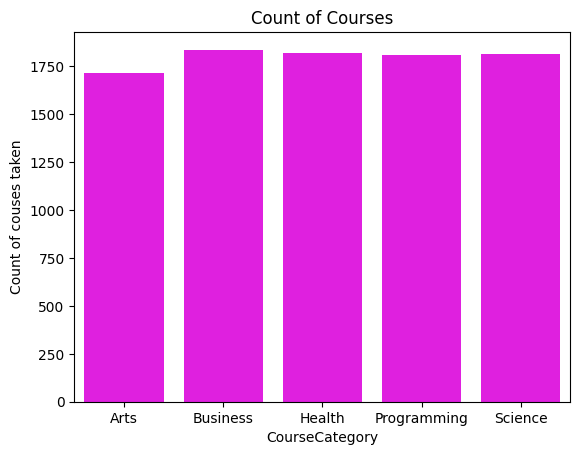

In [7]:
## we see that there are four different category in Courses
##Lets plot graph form them to show how a particular couse are usefull are mostly taken
courses_df = df.groupby('CourseCategory')['CourseCategory'].value_counts()
sns.barplot(x=courses_df.index,y=courses_df.values,color='magenta')
plt.xlabel('CourseCategory')
plt.ylabel('Count of couses taken')
plt.title('Count of Courses')
plt.show()

                Not Completed  Completed
CourseCategory                          
Arts                     1019        699
Business                 1104        733
Health                   1130        691
Programming              1075        735
Science                  1104        710


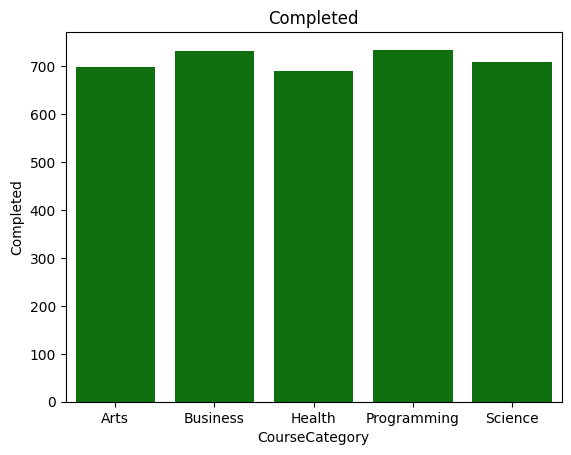

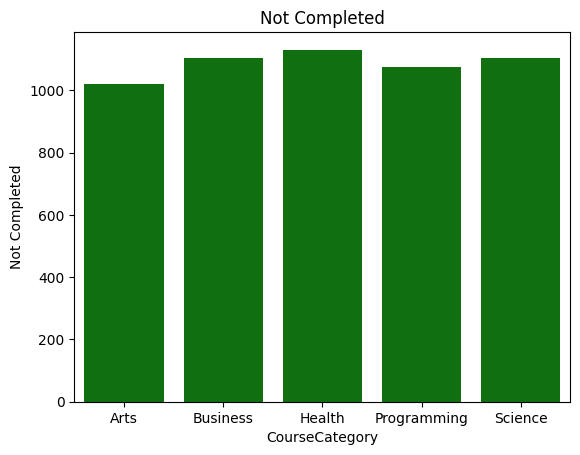

In [8]:
## We see that business couse are the taken by most most of the user but the difference is not to much between other courses
##Now we seet that which course is complted by most number of user and which courses are not completed by most users
completion_stats = df.groupby('CourseCategory')['CourseCompletion'].value_counts().unstack()
completion_stats.columns = ['Not Completed', 'Completed']
print(completion_stats)
def coursecompletion(index,coldata,type):
    sns.barplot(x=index,y=coldata,color='green',orient='v',fill=True,legend='full')
    plt.xlabel('CourseCategory')
    plt.title(f'{type}')
    plt.axis()
    plt.show()

coursecompletion(completion_stats.index,completion_stats['Completed'],'Completed')
coursecompletion(completion_stats.index,completion_stats['Not Completed'],'Not Completed')


In [9]:
grouped_by = df.groupby(['CourseCategory', 'CourseCompletion'])[['TimeSpentOnCourse', 'NumberOfVideosWatched', 'QuizScores']].sum().reset_index()
counts = df.groupby(['CourseCategory', 'CourseCompletion']).size().reset_index(name='Counts')
grouped_by = pd.merge(grouped_by, counts, on=['CourseCategory', 'CourseCompletion'])
grouped_by['AvgTimeSpentOnCourse'] = grouped_by['TimeSpentOnCourse'] / grouped_by['Counts']
grouped_by['AvgNumberOfVideosWatched'] = grouped_by['NumberOfVideosWatched'] / grouped_by['Counts']
grouped_by['AvgQuizScores'] = grouped_by['QuizScores'] / grouped_by['Counts']
grouped_by



,CourseCategory,CourseCompletion,TimeSpentOnCourse,NumberOfVideosWatched,QuizScores,Counts,AvgTimeSpentOnCourse,AvgNumberOfVideosWatched,AvgQuizScores
0,Arts,0,46216.982774,8960,72494.306552,1019,45.355233,8.792934,71.142597
1,Arts,1,39188.970159,8280,55990.035494,699,56.064335,11.845494,80.100194
2,Business,0,50000.486201,9577,78786.348461,1104,45.290295,8.674819,71.364446
3,Business,1,41807.181561,8632,58988.504374,733,57.035718,11.776262,80.475449
4,Health,0,53218.335281,10025,80988.355992,1130,47.095872,8.871681,71.671111
5,Health,1,39182.605327,8019,55848.798255,691,56.704205,11.604920,80.823152
6,Programming,0,49892.039401,10147,76072.531642,1075,46.411199,9.439070,70.765146
7,Programming,1,41804.713916,8682,58418.259456,735,56.877162,11.812245,79.480625
8,Science,0,50265.179861,9524,78473.803189,1104,45.530054,8.626812,71.081343
9,Science,1,39897.906986,8376,56293.306962,710,56.194235,11.797183,79.286348


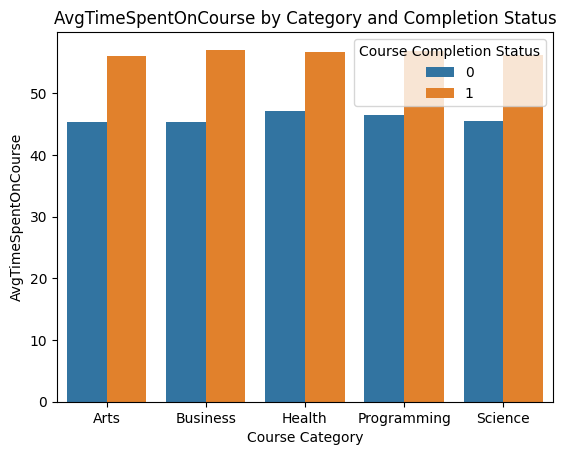

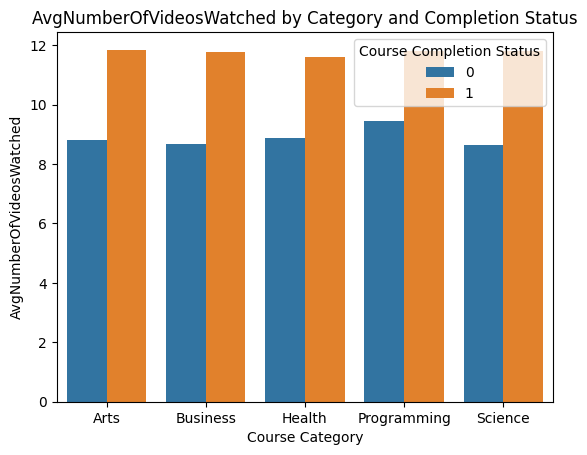

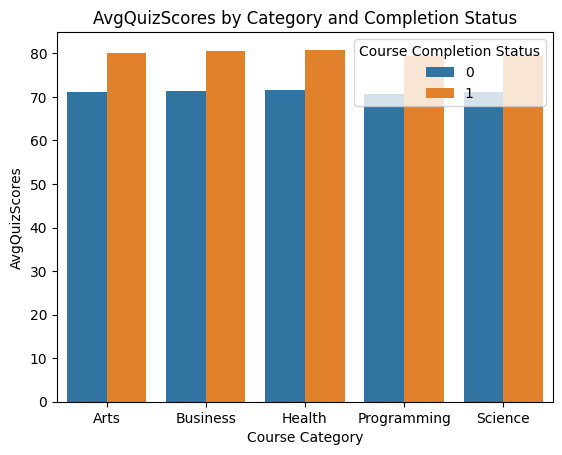

In [10]:
def differentplot(col):
      sns.barplot(x='CourseCategory', y=f'{col}', data=grouped_by,hue='CourseCompletion')
      # sns.barplot(x='CourseCategory', y=f'{col}', data=grouped_by[grouped_by['CourseCompletion'] == 1], 
      #             color='red', label='Completed')
      plt.xlabel('Course Category')
      plt.ylabel(f'{col}')
      plt.title(f'{col} by Category and Completion Status')
      plt.legend(title='Course Completion Status')
      plt.show()
cols=grouped_by.columns
for i in range(6,9):
      differentplot(cols[i])

In [11]:
device_df = df.groupby('DeviceType').size().reset_index(name='devicecounts')
device_df

,DeviceType,devicecounts
0,0,4494
1,1,4506


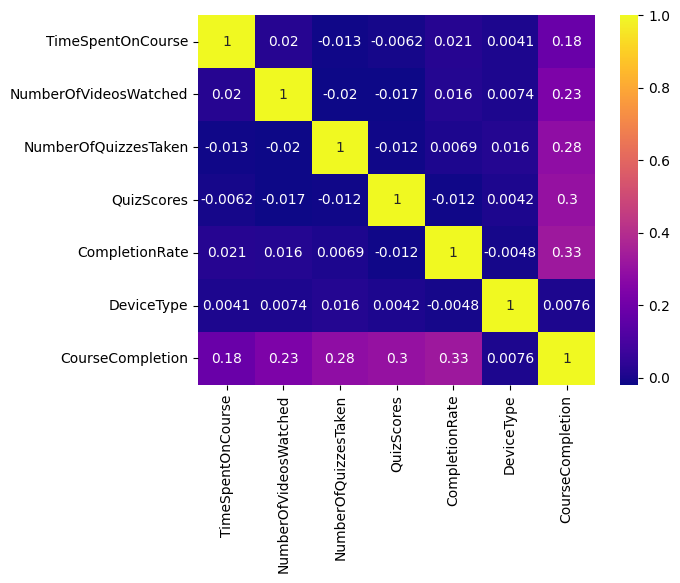

In [12]:
sns.heatmap(data=df.select_dtypes(include=['int32','int64','float32','float64']).corr(),annot=True,cmap='plasma')
plt.show()

In [13]:
df.select_dtypes(include=['int32','int64','float32','float64']).corr()['CourseCompletion']

TimeSpentOnCourse        0.182553
NumberOfVideosWatched    0.234360
NumberOfQuizzesTaken     0.284504
QuizScores               0.299983
CompletionRate           0.326139
DeviceType               0.007551
CourseCompletion         1.000000
Name: CourseCompletion, dtype: float64

In [25]:
data = df.drop(['DeviceType'],axis=1)
data


,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,CourseCompletion
0,Health,29.979719,17,3,50.365656,20.860773,0
1,Arts,27.802640,1,5,62.615970,65.632415,0
2,Arts,86.820485,14,2,78.458962,63.812007,1
3,Science,35.038427,17,10,59.198853,95.433162,1
4,Programming,92.490647,16,0,98.428285,18.102478,0
...,...,...,...,...,...,...,...
8995,Health,37.445225,14,4,54.469359,32.990704,0
8996,Science,48.631443,7,7,59.413257,0.254625,0
8997,Health,38.212512,3,3,69.508297,70.188159,0
8998,Health,70.048665,13,10,79.655182,72.975225,1


In [26]:
train = data.drop('CourseCompletion',axis=1)
test = data['CourseCompletion']


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

In [28]:
x_train,x_test,y_train,y_test = train_test_split(train,test,test_size=0.2,random_state=2)
x_train.shape,x_test.shape

((7200, 6), (1800, 6))

In [29]:
cf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse_output=False,drop='first'),['CourseCategory'])
],remainder='passthrough',force_int_remainder_cols=False)

In [37]:
def accuracy_score(model):
     y_pred = model.predict(x_test)
     accuracy = metrics.accuracy_score(y_test, y_pred)
     print(f"Accuracy: {accuracy:.2f}")
     
     cm = metrics.confusion_matrix(y_test, y_pred)
     
     plt.figure(figsize=(8, 6))
     sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='g', cbar=False)
     plt.xlabel('Predicted')
     plt.ylabel('True')
     plt.title('Confusion Matrix')
     plt.show()

Accuracy: 0.81


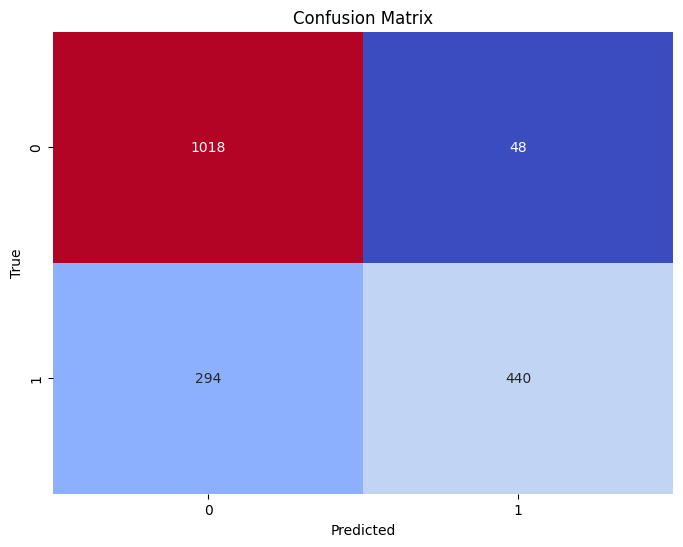

In [39]:
rbf_kernel_svm_clf = Pipeline([
    ('encoding',cf),
    ('scaler',StandardScaler()),
    ('svm_clf',SVC(kernel='rbf',gamma=5,C=1))
])
rbf_kernel_svm_clf.fit(x_train,y_train)
accuracy_score(rbf_kernel_svm_clf)

Accuracy: 0.88


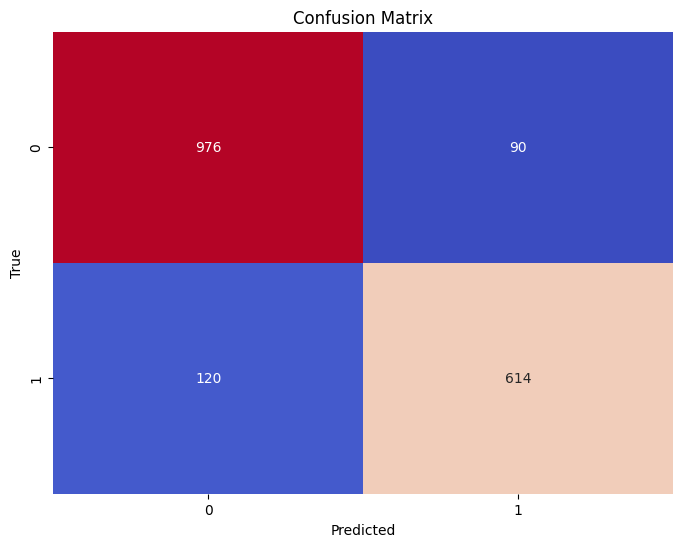

In [40]:
poly_kernel_svm_clf = Pipeline([
    ('encoding',cf),
    ('scaler',StandardScaler()),
    ('svm_clf',SVC(kernel='poly',degree=5,coef0=1,C=5))
])
poly_kernel_svm_clf.fit(x_train,y_train)
accuracy_score(poly_kernel_svm_clf)

Accuracy: 0.89


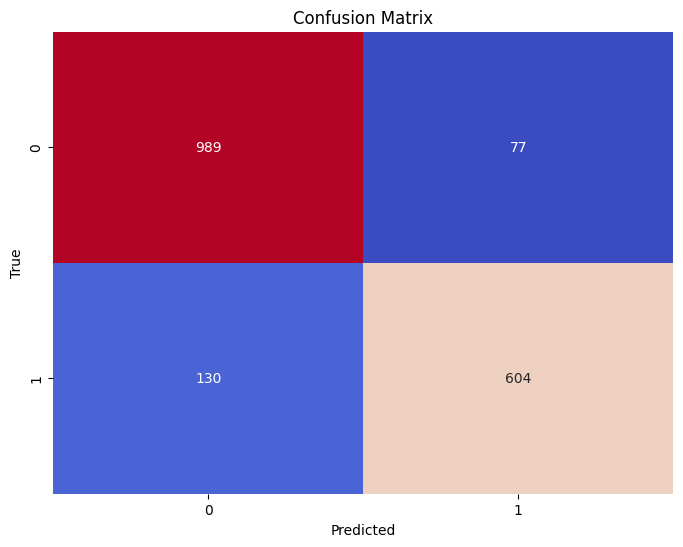

In [45]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(estimators=[('lr',log_clf),('rf',rnd_clf),('svc',svm_clf)],
                              voting='hard')
voting_clf_pipe = Pipeline([
    ('encoding',cf),
    ('scaler',StandardScaler()),
    ('voting_clf',voting_clf)
])
voting_clf_pipe.fit(x_train,y_train)
accuracy_score(voting_clf_pipe)

Accuracy: 0.93


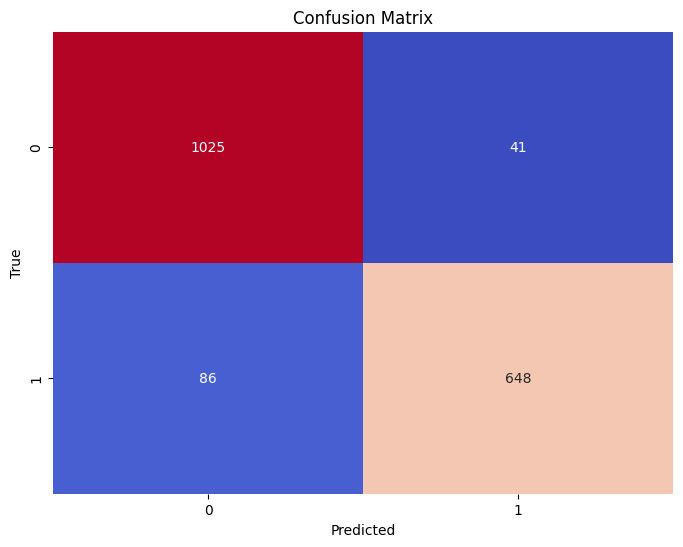

In [48]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),n_estimators=750,
    max_samples=100,bootstrap=True,n_jobs=-1
)
bag_clf_pipe = Pipeline([
    ('encoding',cf),
    ('scaler',StandardScaler()),
    ('bag_clf',bag_clf)
])
bag_clf_pipe.fit(x_train,y_train)
accuracy_score(bag_clf_pipe)

In [50]:
import pickle
pickle.dump(bag_clf_pipe,open('pipe.pkl','wb'))

In [51]:
x_train

,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate
5536,Arts,98.966916,0,8,72.013344,56.832572
3399,Business,98.850598,8,2,96.684352,44.441902
3314,Health,27.025189,15,9,54.455846,41.075513
3515,Arts,93.455450,4,8,90.630705,52.032292
3128,Business,47.317069,1,10,88.153770,89.539289
...,...,...,...,...,...,...
1099,Programming,90.910770,8,9,58.789283,83.840999
2514,Health,66.436408,0,1,75.866449,15.474604
6637,Business,26.454352,3,4,84.572644,10.302102
2575,Science,59.561351,18,5,72.638629,21.669482
